# Predicting the 2025-2026 NBA Scoring leaders

## Loading the Data

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

nbapg_2025 = pd.read_csv("C:/Users/james/OneDrive/Desktop/NBA_Per_Game/nba_2025_per_game_cleaned.csv")
nbaadv_2025 = pd.read_csv("C:/Users/james/OneDrive/Desktop/NBA_Advanced/nba_2025_advanced_cleaned.csv")
per_100_2025 = pd.read_csv("C:/Users/james/OneDrive/Desktop/NBA_Advanced/nba_2025_per_100_cleaned.csv")

nbapg_2024 = pd.read_csv("C:/Users/james/OneDrive/Desktop/NBA_Per_Game/nba_2024_per_game_cleaned.csv")
nbaadv_2024 = pd.read_csv("C:/Users/james/OneDrive/Desktop/NBA_Advanced/nba_2024_advanced_cleaned.csv")
per_100_2024 = pd.read_csv("C:/Users/james/OneDrive/Desktop/NBA_Advanced/nba_2024_per_100_cleaned.csv")

nbapg_2025.insert(1, "Year", "2025")                         
nbapg_2024.insert(1, "Year", "2024")

nbapg_2024["Year"] = nbapg_2024["Year"].astype("int64").round(0)
nbapg_2025["Year"] = nbapg_2025["Year"].astype("int64").round(0)

In [2]:
nbapg_2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  569 non-null    object 
 1   Year    569 non-null    int64  
 2   Age     569 non-null    int64  
 3   Team    569 non-null    object 
 4   Pos     569 non-null    object 
 5   G       569 non-null    int64  
 6   GS      569 non-null    int64  
 7   MP      569 non-null    float64
 8   FG      569 non-null    float64
 9   FGA     569 non-null    float64
 10  FG%     566 non-null    float64
 11  3P      569 non-null    float64
 12  3PA     569 non-null    float64
 13  3P%     541 non-null    float64
 14  2P      569 non-null    float64
 15  2PA     569 non-null    float64
 16  2P%     561 non-null    float64
 17  eFG%    566 non-null    float64
 18  FT      569 non-null    float64
 19  FTA     569 non-null    float64
 20  FT%     547 non-null    float64
 21  ORB     569 non-null    float64
 22  DR

In [5]:
per_100_2025.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  569 non-null    object 
 1   Age     569 non-null    int64  
 2   Team    569 non-null    object 
 3   Pos     569 non-null    object 
 4   G       569 non-null    int64  
 5   GS      569 non-null    int64  
 6   MP      569 non-null    int64  
 7   FG      569 non-null    float64
 8   FGA     569 non-null    float64
 9   FG%     566 non-null    float64
 10  3P      569 non-null    float64
 11  3PA     569 non-null    float64
 12  3P%     541 non-null    float64
 13  2P      569 non-null    float64
 14  2PA     569 non-null    float64
 15  2P%     561 non-null    float64
 16  eFG%    566 non-null    float64
 17  FT      569 non-null    float64
 18  FTA     569 non-null    float64
 19  FT%     547 non-null    float64
 20  ORB     569 non-null    float64
 21  DRB     569 non-null    float64
 22  TR

In [7]:
#Renaming PTS column in Per 100 for clarity
per_100_2025.rename(columns={"PTS" : "PTS_Per_100"}, inplace=True)
per_100_2024.rename(columns={"PTS" : "PTS_Per_100"}, inplace=True)

In [9]:
nbapg_agg = pd.concat([nbapg_2025, nbapg_2024], ignore_index=True)
nbaadv_agg = pd.concat([nbaadv_2025, nbaadv_2024], ignore_index=True)
nba_per_100 = pd.concat([per_100_2025, per_100_2024], ignore_index=True)


In [11]:
nbapg_agg.head()

,Player,Year,Age,Team,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,Shai Gilgeous-Alexander,2025,26,OKC,PG,76,76,34.2,11.3,21.8,...,0.9,4.1,5.0,6.4,1.7,1.0,2.4,2.2,32.7,NaN
1,Giannis Antetokounmpo,2025,30,MIL,PF,67,67,34.2,11.8,19.7,...,2.2,9.7,11.9,6.5,0.9,1.2,3.1,2.3,30.4,NaN
2,Nikola JokiÄ,2025,29,DEN,C,70,70,36.7,11.2,19.5,...,2.9,9.9,12.7,10.2,1.8,0.6,3.3,2.3,29.6,NaN
3,Luka DonÄiÄ,2025,25,2TM,PG,50,50,35.4,9.2,20.5,...,0.8,7.4,8.2,7.7,1.8,0.4,3.6,2.5,28.2,NaN
4,Anthony Edwards,2025,23,MIN,SG,79,79,36.3,9.1,20.4,...,0.8,4.9,5.7,4.5,1.2,0.6,3.2,1.9,27.6,NaN


In [13]:
# Cleaning player names for readability

nbapg_agg['Player'] = nbapg_agg['Player'].apply(lambda x: x.encode('latin1').decode('utf-8'))
nbaadv_agg['Player'] = nbaadv_agg['Player'].apply(lambda x: x.encode('latin1').decode('utf-8'))
nba_per_100['Player'] = nba_per_100['Player'].apply(lambda x: x.encode('latin1').decode('utf-8'))

## Data Exploration

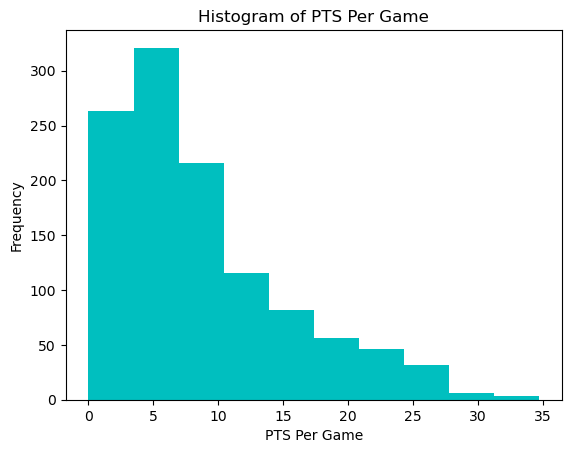

 PPG skew value: 1.1200938892013286


In [15]:
plt.hist(nbapg_agg["PTS"], histtype="bar", align="mid", color="c")
plt.title("Histogram of PTS Per Game")
plt.xlabel("PTS Per Game")
plt.ylabel("Frequency")
plt.show()

print(f" PPG skew value: {nbapg_agg["PTS"].skew()}")

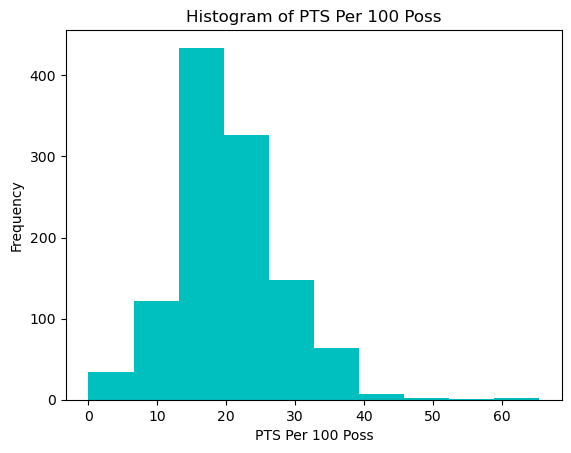

 PTS Per 100 skew value: 0.6138935693328444


In [17]:
plt.hist(nba_per_100["PTS_Per_100"], histtype="bar", align="mid", color="c")
plt.title("Histogram of PTS Per 100 Poss")
plt.xlabel("PTS Per 100 Poss")
plt.ylabel("Frequency")
plt.show()

print(f" PTS Per 100 skew value: {nba_per_100["PTS_Per_100"].skew()}")


PTS per 100 possessions takes into account a teams pace, which is important when trying to predict scoring because each teams offense runs differently, and some players have the benefit of playing in an offense that generates alot of scoring opportunities while others do not. We can also see that it is distributed normally, whereas per game scoring averages are not. PTS Per 100 Poss seems to be an important predictor. 

In [19]:
agg_pg = nbapg_agg.groupby(['Player']).mean(numeric_only=True).reset_index()
pd.options.display.float_format = '{:.3f}'.format

agg_adv = nbaadv_agg.groupby(['Player']).mean(numeric_only=True).reset_index()
pd.options.display.float_format = '{:.3f}'.format

In [21]:
#Players who have averaged the most PPG the past 2 seasons
ptsper = agg_pg[['Player', 'PTS']].sort_values(by="PTS", ascending=False)
print(ptsper.head())

                      Player    PTS
598  Shai Gilgeous-Alexander 31.400
446              Luka Dončić 31.050
217    Giannis Antetokounmpo 30.400
339              Joel Embiid 29.250
516             Nikola Jokić 28.000


In [23]:
#Players on average who have the most FGA per game the past 2 seasons
fga = agg_pg[['Player', 'FGA']].sort_values(by="FGA", ascending=False)
print(fga.head())

                      Player    FGA
446              Luka Dončić 22.050
598  Shai Gilgeous-Alexander 20.800
663             Tyrese Maxey 20.650
431              LaMelo Ball 20.250
35           Anthony Edwards 20.050


In [25]:
#Finding the Players with the Top Usage % 

#Filtering for Players who have averaged over 65 Games for the last two years
usage = agg_adv[agg_adv["G"] > 65]
usage = usage[['Player', 'USG%']].sort_values(by="USG%", ascending=False)
print(usage.head())

                      Player   USG%
217    Giannis Antetokounmpo 34.100
598  Shai Gilgeous-Alexander 33.800
80           Cade Cunningham 32.000
35           Anthony Edwards 31.850
278            Jalen Brunson 31.000


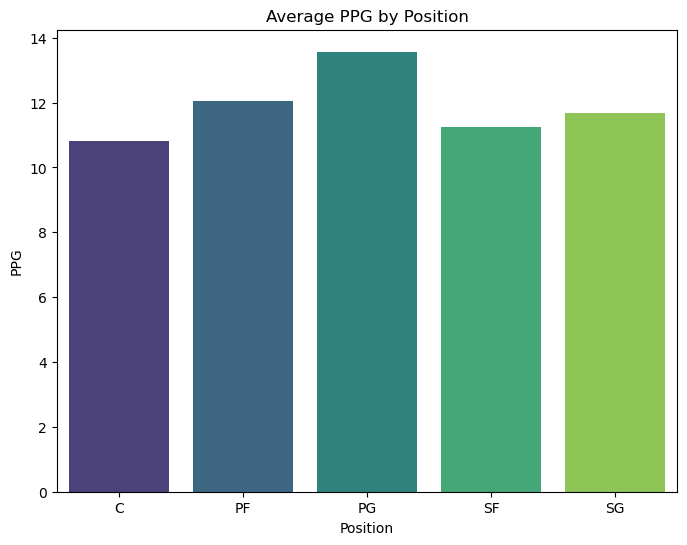

In [27]:
# Finding average ppg per position

#Finding players who have played in 50 or more games 
pos_sa = nbapg_agg[nbapg_agg['G'] >= 50]
pos_sa = pos_sa.groupby('Pos')['PTS'].mean().reset_index(name='PPG')


plt.figure(figsize=(8,6))
sns.barplot(x= 'Pos', y='PPG', hue='Pos', data=pos_sa, palette='viridis')
plt.xlabel('Position')
plt.ylabel('PPG')
plt.title('Average PPG by Position')
plt.show()



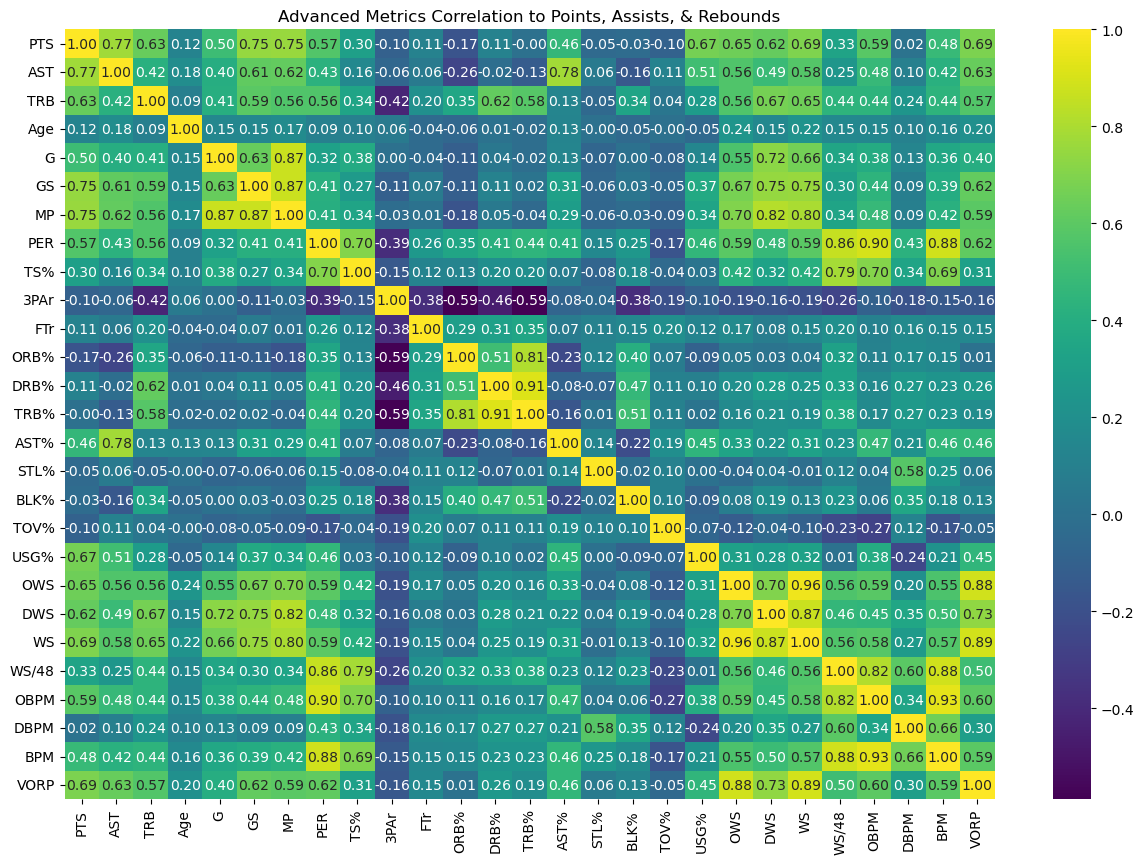

In [29]:

nbapg = nbapg_agg[["Player", "PTS", "AST", "TRB"]]


corr_merged = nbapg.merge(nbaadv_agg, on="Player", how="outer")

corr_merged = corr_merged.drop(["Player", "Team", "Pos", "Awards"], axis=1)

corr_merged = corr_merged.corr()

plt.figure(figsize=(15,10))
plt.title("Advanced Metrics Correlation to Points, Assists, & Rebounds")
sns.heatmap(corr_merged, annot=True, cmap='viridis', fmt='.2f')
plt.show()

Offensive Win Shares, Win Shares, OBPM, Usage Percentage, VORP, and PER (Player Efficiency Rating) all possess a strong positive correlation (>.5) with the target variable, which in this case is points per game. Some of these metrics might be redundant due to their reliance on scoring being factored into their creation. However, Usage% indicates how often plays are run through a player while they are on the floor, which is an important variable when it comes to predicting scoring.  


## Feature Engineering & Data Prep

Adding in some additional variables that could be useful in predicting PPG

In [31]:
#Adding Usage %
adv_2024 = nbaadv_2024[["Player", "USG%"]]
adv_2025 = nbaadv_2025[["Player", "USG%"]]

#Adding Points Per 100 Poss to account for pace
pts100_2024 = per_100_2024[["Player", "PTS_Per_100"]]
pts100_2025 = per_100_2025[["Player", "PTS_Per_100"]]


nbapg_2024 = nbapg_2024.merge(pts100_2024, on="Player", how="outer")
nbapg_2025 = nbapg_2025.merge(pts100_2024, on="Player", how="outer")

merged_2024 = nbapg_2024.merge(adv_2024, on="Player", how="outer")
merged_2025 = nbapg_2025.merge(adv_2025, on="Player", how="outer")

#Adding column to show a player's durability and dependability
merged_2024["Reliability_Score"] = merged_2024["G"]/82*100
merged_2025["Reliability_Score"] = merged_2025["G"]/82*100

#Adding Column to take into account the frequency a player starts
merged_2024["Starter_rate"] = merged_2024["GS"] / merged_2024["G"]
merged_2025["Starter_rate"] = merged_2025["GS"] / merged_2025["G"]

#Filtering out players who have played insufficient minutes and games
merged_2024 = merged_2024[(merged_2024['G'] >= 15) & (merged_2024["MP"] >= 10)] 
merged_2025 = merged_2025[(merged_2025['G'] >= 15) & (merged_2025["MP"] >= 10)]

#Final 
merged_df = pd.concat([merged_2025, merged_2024], ignore_index=True)
merged_df.head()

,Player,Year,Age,Team,Pos,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,Awards,PTS_Per_100,USG%,Reliability_Score,Starter_rate
0,A.J. Green,2025.000,25.000,MIL,SG,73.000,7.000,22.700,2.500,5.800,...,0.500,0.100,0.500,2.200,7.400,NaN,19.700,12.600,89.024,0.096
1,A.J. Lawson,2025.000,24.000,TOR,SG,26.000,2.000,18.700,3.100,7.300,...,0.500,0.200,0.600,1.700,9.100,NaN,21.000,20.000,31.707,0.077
2,AJ Johnson,2025.000,20.000,2TM,SG,29.000,11.000,22.000,2.800,7.300,...,0.400,0.100,1.200,1.700,7.600,NaN,NaN,17.400,35.366,0.379
3,Aaron Gordon,2025.000,29.000,DEN,PF,51.000,42.000,28.400,5.200,9.700,...,0.500,0.300,1.400,1.600,14.700,NaN,21.900,19.000,62.195,0.824
4,Aaron Holiday,2025.000,28.000,HOU,PG,62.000,3.000,12.800,1.900,4.300,...,0.300,0.200,0.600,1.000,5.500,NaN,19.600,16.800,75.610,0.048


In [33]:
merged_df.isna().sum()

Player                 0
Year                   0
Age                    0
Team                   0
Pos                    0
G                      0
GS                     0
MP                     0
FG                     0
FGA                    0
FG%                    0
3P                     0
3PA                    0
3P%                   25
2P                     0
2PA                    0
2P%                    0
eFG%                   0
FT                     0
FTA                    0
FT%                    0
ORB                    0
DRB                    0
TRB                    0
AST                    0
STL                    0
BLK                    0
TOV                    0
PF                     0
PTS                    0
Awards               778
PTS_Per_100           54
USG%                   0
Reliability_Score      0
Starter_rate           0
dtype: int64

In [35]:
merged_df = merged_df.drop(['Awards'], axis=1)
merged_df.dropna(inplace=True)

In [37]:
merged_df.isna().sum()

Player               0
Year                 0
Age                  0
Team                 0
Pos                  0
G                    0
GS                   0
MP                   0
FG                   0
FGA                  0
FG%                  0
3P                   0
3PA                  0
3P%                  0
2P                   0
2PA                  0
2P%                  0
eFG%                 0
FT                   0
FTA                  0
FT%                  0
ORB                  0
DRB                  0
TRB                  0
AST                  0
STL                  0
BLK                  0
TOV                  0
PF                   0
PTS                  0
PTS_Per_100          0
USG%                 0
Reliability_Score    0
Starter_rate         0
dtype: int64

In [39]:
#Removing Players who are missing the 2025-2026 season due to injury
merged_df = merged_df[(merged_df['Player'] != 'Jayson Tatum') & (merged_df['Player'] != 'Tyrese Haliburton') & (merged_df['Player'] != 'Damian Lillard')]


merged_df.head()

,Player,Year,Age,Team,Pos,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,PTS_Per_100,USG%,Reliability_Score,Starter_rate
0,A.J. Green,2025.000,25.000,MIL,SG,73.000,7.000,22.700,2.500,5.800,...,1.500,0.500,0.100,0.500,2.200,7.400,19.700,12.600,89.024,0.096
1,A.J. Lawson,2025.000,24.000,TOR,SG,26.000,2.000,18.700,3.100,7.300,...,1.200,0.500,0.200,0.600,1.700,9.100,21.000,20.000,31.707,0.077
3,Aaron Gordon,2025.000,29.000,DEN,PF,51.000,42.000,28.400,5.200,9.700,...,3.200,0.500,0.300,1.400,1.600,14.700,21.900,19.000,62.195,0.824
4,Aaron Holiday,2025.000,28.000,HOU,PG,62.000,3.000,12.800,1.900,4.300,...,1.300,0.300,0.200,0.600,1.000,5.500,19.600,16.800,75.610,0.048
5,Aaron Nesmith,2025.000,25.000,IND,SF,45.000,37.000,25.000,4.300,8.400,...,1.200,0.800,0.400,0.800,2.500,12.000,20.700,17.400,54.878,0.822


In [41]:
train_df = merged_df.drop(['Team', 'Pos', 'BLK','TOV','ORB','DRB', 'PF', 'STL'], axis = 1)
train_df = train_df[
    (train_df['Year'] == 2024) & 
    (train_df['Player'].isin(train_df[train_df['Year'] == 2025]['Player'])) 
]


pred_df = merged_df[
    (merged_df['Year'] == 2025) & 
    (merged_df['Player'].isin(merged_df[merged_df['Year'] == 2024]['Player'])) 
]


pred_var = pred_df[['PTS']]

test_df = pred_df.drop(['Team', 'Pos', 'BLK','TOV','ORB','DRB', 'PF','STL', 'PTS'], axis = 1)


In [43]:
test_df = test_df.set_index('Player')
train_df = train_df.set_index('Player')
print(len(train_df), len(test_df))
train_df.tail()

311 311


,Year,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT,FTA,FT%,TRB,AST,PTS,PTS_Per_100,USG%,Reliability_Score,Starter_rate
Player,,,,,,,,,,,,,,,,,,,,,
Wendell Carter Jr.,2024.000,24.000,55.000,48.000,25.600,4.100,7.700,0.525,1.200,3.100,...,1.700,2.400,0.694,6.900,1.700,11.000,21.200,17.200,67.073,0.873
Zach Collins,2024.000,26.000,69.000,29.000,22.100,4.300,8.900,0.484,0.800,2.600,...,1.800,2.300,0.753,5.400,2.800,11.200,24.100,22.700,84.146,0.420
Zach LaVine,2024.000,28.000,25.000,23.000,34.900,6.800,15.000,0.452,2.400,6.800,...,3.500,4.100,0.854,5.200,3.900,19.500,27.800,23.800,30.488,0.920
Ziaire Williams,2024.000,22.000,51.000,15.000,20.400,2.900,7.400,0.397,1.100,3.700,...,1.200,1.500,0.827,3.500,1.500,8.200,19.800,19.700,62.195,0.294
Zion Williamson,2024.000,23.000,70.000,70.000,31.500,8.900,15.600,0.570,0.100,0.300,...,5.000,7.100,0.702,5.800,5.000,22.900,35.600,29.700,85.366,1.000


## Modeling 

In [45]:
from sklearn.linear_model import LinearRegression

#Train & Test
X_train = train_df
y_train_pts = train_df['PTS']
X_test = test_df
y_test_pts = pred_var

X_train = X_train.drop('PTS', axis=1)

# make the regressor object
model_lr = LinearRegression()


# Train the model
model_lr.fit(X_train, y_train_pts)

LinearRegression()

In [47]:
pts_pred_lr = model_lr.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


lr_r2 = r2_score(y_test_pts, pts_pred_lr)
lr_mae = mean_absolute_error(y_test_pts, pts_pred_lr)
lr_mse = mean_squared_error(y_test_pts, pts_pred_lr)

print(f" Linear Regression R2: {lr_r2:.3f}")
print(f" Linear Regression MAE: {lr_mae:.3f}")
print(f" Linear Regression MSE: {lr_mse:.3f}")

 Linear Regression R2: 1.000
 Linear Regression MAE: 0.072
 Linear Regression MSE: 0.008


An R2 value of 1 with extremely low error measures would suggest overfitting. 

In [49]:

from sklearn.model_selection import cross_val_score

#Using cross validation to futher test for overfitting
lr_scores = cross_val_score(model_lr, X_train, y_train_pts, cv=5, scoring='r2')

print("Cross-validated R2 scores:", lr_scores)
print("Average R2:", lr_scores.mean())

Cross-validated R2 scores: [0.99984277 0.99984577 0.99987589 0.99984056 0.99987261]
Average R2: 0.9998555205911563


In [51]:
from sklearn.ensemble import RandomForestRegressor

model_pts_forest = RandomForestRegressor()

model_pts_forest.fit(X_train, y_train_pts)

RandomForestRegressor()

In [53]:
pts_pred_rf = model_pts_forest.predict(X_test)

rf_r2 = r2_score(y_test_pts, pts_pred_rf)
rf_mae = mean_absolute_error(y_test_pts, pts_pred_rf)
rf_mse = mean_squared_error(y_test_pts, pts_pred_rf)

print(f" Random Forest R2: {rf_r2:.3f}")
print(f" Random Forest MAE: {rf_mae:.3f}")
print(f" Random Forest MSE: {rf_mse:.3f}")

 Random Forest R2: 0.986
 Random Forest MAE: 0.522
 Random Forest MSE: 0.566


In [55]:
rf_scores = cross_val_score(model_pts_forest, X_train, y_train_pts, cv=5, scoring='r2')

print("Cross-validated R2 scores:", rf_scores)
print("Average R2:", rf_scores.mean())

Cross-validated R2 scores: [0.99068879 0.98944616 0.98585924 0.98351738 0.98653781]
Average R2: 0.9872098756674733


In [57]:
from sklearn import linear_model

# create a regressor object
clf = linear_model.Lasso(alpha=0.1, random_state = 42)

# fit the regressor with X and y data
clf.fit(X_train, y_train_pts)

Lasso(alpha=0.1, random_state=42)

In [59]:
pts_pred_clf = clf.predict(X_test)

clf_r2 = r2_score(y_test_pts, pts_pred_clf)
clf_mae = mean_absolute_error(y_test_pts, pts_pred_clf)
clf_mse = mean_squared_error(y_test_pts, pts_pred_clf)

print(f" Lasso R2: {clf_r2:.3f}")
print(f" Lasso MAE: {clf_mae:.3f}")
print(f" Lasso MSE: {clf_mse:.3f}")

 Lasso R2: 0.966
 Lasso MAE: 0.945
 Lasso MSE: 1.436


In [61]:
lasso_scores = cross_val_score(clf, X_train, y_train_pts, cv=5, scoring='r2')

print("Cross-validated R2 scores:", lasso_scores)
print("Average R2:", lasso_scores.mean())

Cross-validated R2 scores: [0.99497005 0.99719481 0.99675449 0.99587772 0.99663691]
Average R2: 0.9962867955995085


In [63]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and y data
regressor.fit(X_train, y_train_pts)

DecisionTreeRegressor(random_state=0)

In [65]:
pts_pred_reg = regressor.predict(X_test)

reg_r2 = r2_score(y_test_pts, pts_pred_reg)
reg_mae = mean_absolute_error(y_test_pts, pts_pred_reg)
reg_mse = mean_squared_error(y_test_pts, pts_pred_reg)

print(f" Regressor R2: {reg_r2:.3f}")
print(f" Regressor MAE: {reg_mae:.3f}")
print(f" Regressor MSE: {reg_mse:.3f}")


 Regressor R2: 0.966
 Regressor MAE: 0.820
 Regressor MSE: 1.424


In [67]:
dt_scores = cross_val_score(regressor, X_train, y_train_pts, cv=5, scoring='r2')

print("Cross-validated R2 scores:", dt_scores)
print("Average R2:", dt_scores.mean())

Cross-validated R2 scores: [0.98182244 0.96777895 0.9755096  0.96945297 0.96002622]
Average R2: 0.9709180332464001


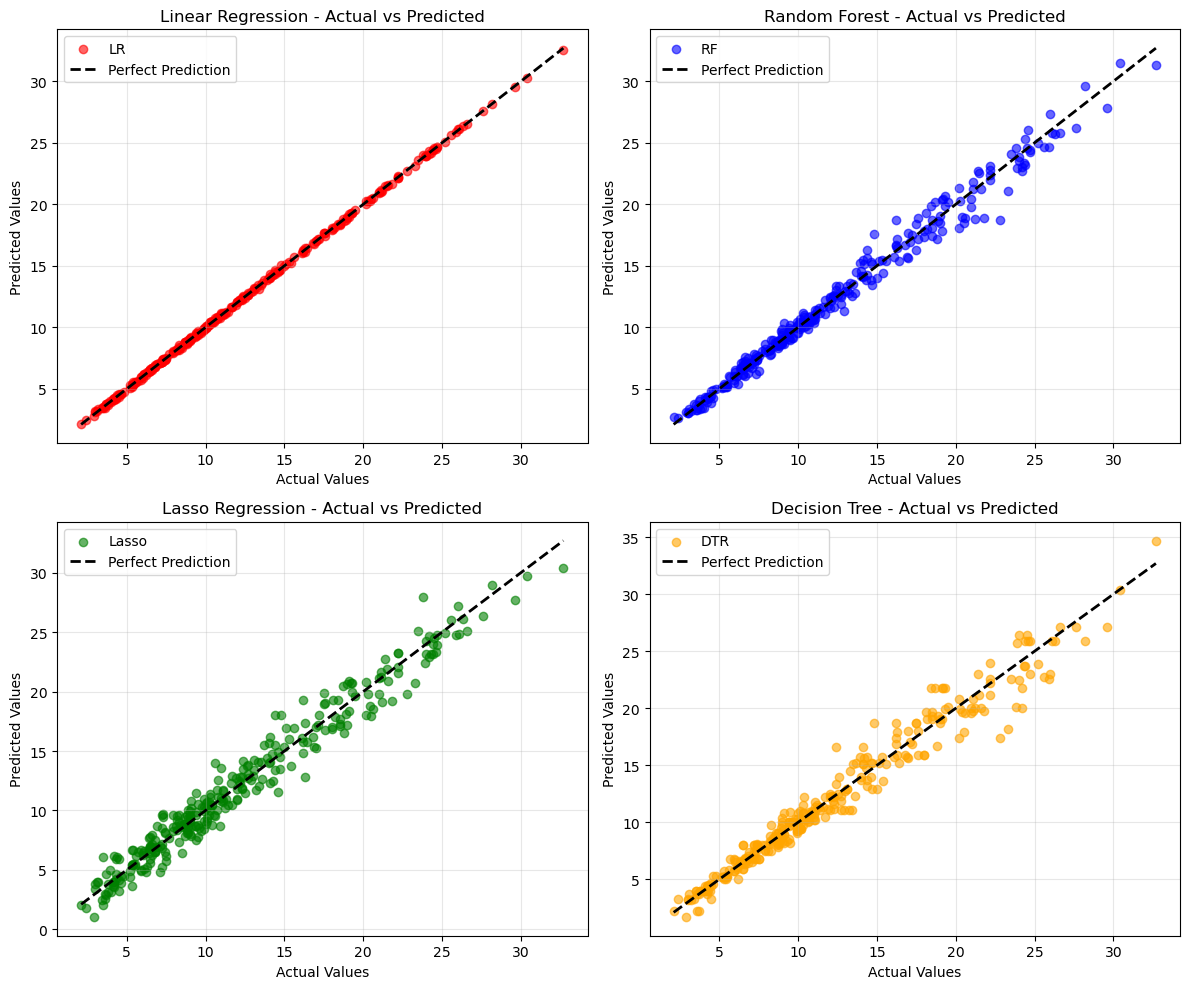

In [69]:
#Creating Subplots to illustrate Predicting vs Actual for each model

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  


models = [
    (y_test_pts, pts_pred_lr, 'LR', 'Linear Regression', 'red'),
    (y_test_pts, pts_pred_rf, 'RF', 'Random Forest', 'blue'),
    (y_test_pts, pts_pred_clf, 'Lasso', 'Lasso Regression', 'green'), 
    (y_test_pts, pts_pred_reg, 'DTR', 'Decision Tree', 'orange')
]

for i, (actual, predicted, label, title, color) in enumerate(models):
    axes[i].scatter(actual, predicted, alpha=0.6, label=label, color=color)
    axes[i].plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=2, label="Perfect Prediction")
    axes[i].set_xlabel('Actual Values')
    axes[i].set_ylabel('Predicted Values')
    axes[i].set_title(f'{title} - Actual vs Predicted')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)  

plt.tight_layout()
plt.show()


Here we can see the severe overfitting that occurs with the linear regression model as it is simply memorizing the training data and predicting perfectly on the test. The random forest model has the lowest error measures out of the lasso and decision tree. It also is not overfitting and appears to do a good job of capturing the data. 

In [71]:
full_preds_df = test_df
pts_preds = model_pts_forest.predict(full_preds_df)


In [83]:
pred_points = pred_df.copy().reset_index()

pred_points["2025-26 PPG"] = pts_preds

pred_points = pred_points.sort_values(by="2025-26 PPG", ascending=False)
pred_points['Player'] = pred_points['Player'].apply(lambda x: x.encode('latin1').decode('utf-8'))
print(pred_points[['Player','2025-26 PPG']].head(10))

                      Player  2025-26 PPG
109    Giannis Antetokounmpo       31.456
273  Shai Gilgeous-Alexander       31.312
207              Luka Dončić       29.627
238             Nikola Jokić       27.813
131            Jalen Brunson       27.326
18           Anthony Edwards       26.237
310          Zion Williamson       26.083
186             Kevin Durant       25.825
41           Cade Cunningham       25.773
299             Tyrese Maxey       25.709


In [101]:
#Which Players will see their scoring average rise the most season: 
pred_points["PTS_Diff"] = pred_points["2025-26 PPG"] - pred_points["PTS"]

pred_points = pred_points.sort_values(by="PTS_Diff", ascending=False)
scoring_jump = pred_points[['Player', 'PTS', '2025-26 PPG']].head()


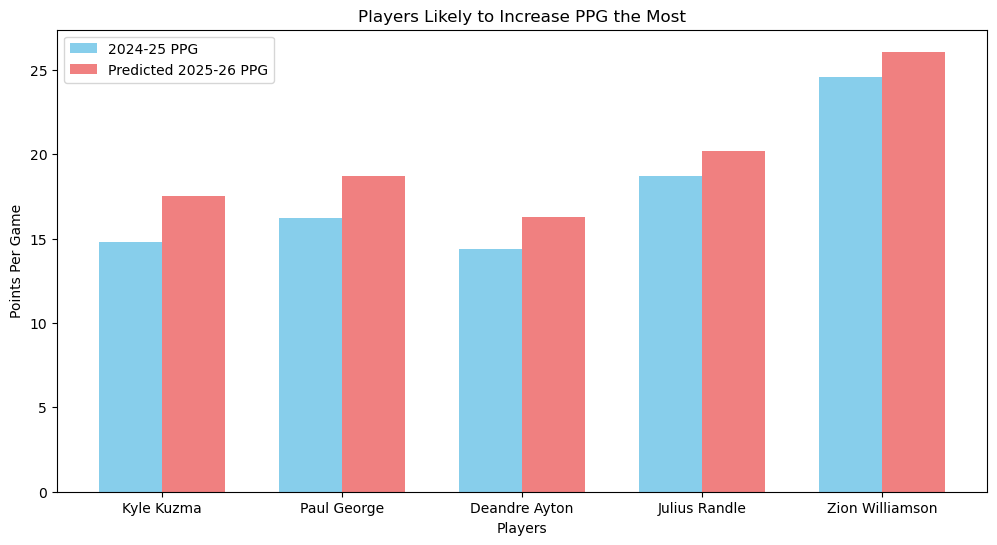

In [105]:
#Creating stacked bar chart 
x = np.arange(len(scoring_jump['Player']))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, scoring_jump['PTS'], width, label='2024-25 PPG', color='skyblue')
plt.bar(x + width/2, scoring_jump['2025-26 PPG'], width, label='Predicted 2025-26 PPG', color='lightcoral')
plt.xlabel('Players')
plt.ylabel('Points Per Game') 
plt.title('Players Likely to Increase PPG the Most')
plt.xticks(x, scoring_jump['Player'], ha='center')
plt.legend()
plt.show()


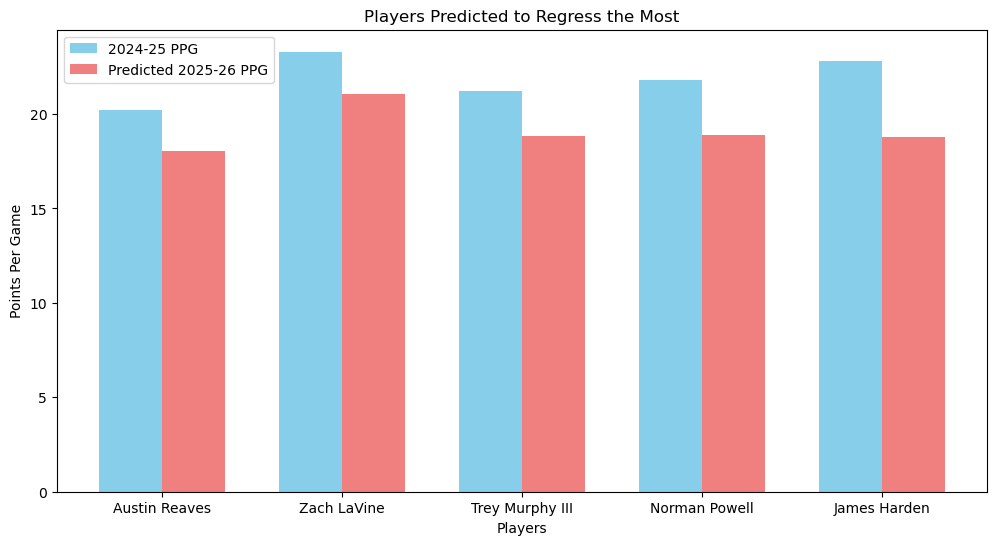

In [107]:
#Examining players who will likely see their scoring average regress
scoring_decline = pred_points[['Player', 'PTS', '2025-26 PPG']].tail()

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, scoring_decline['PTS'], width, label='2024-25 PPG', color='skyblue')
plt.bar(x + width/2, scoring_decline['2025-26 PPG'], width, label='Predicted 2025-26 PPG', color='lightcoral')
plt.xlabel('Players')
plt.ylabel('Points Per Game') 
plt.title('Players Predicted to Regress the Most')
plt.xticks(x, scoring_decline['Player'], ha='center')
plt.legend()
plt.show()